In [39]:
import matplotlib.pyplot as plt
import yfinance as yf
import polars as pl
import pandas as pd

In [38]:
metrics = ["Total Revenue", "EBITDA", "EBIT", "Gross Profit", "Diluted EPS", "Operating Income", "Operating Expense", "Interest Expense", "Tax Rate", "Total Unusual Items"]

df_intel = yf.Ticker("INTC").financials
df_amd = yf.Ticker("AMD").financials
df_nvidia = yf.Ticker("NVDA").financials

df_intel = df_intel[df_intel.index.isin(metrics)]
df_amd = df_amd[df_amd.index.isin(metrics)]
df_nvidia = df_nvidia[df_nvidia.index.isin(metrics)]

df_intel.loc["EBITDA_margin"] = df_intel.loc["EBITDA"] / df_intel.loc["Total Revenue"]
df_amd.loc["EBITDA_margin"] = df_amd.loc["EBITDA"] / df_amd.loc["Total Revenue"]
df_nvidia.loc["EBITDA_margin"] = df_nvidia.loc["EBITDA"] / df_nvidia.loc["Total Revenue"]

df_intel.loc["EBIT_margin"] = df_intel.loc["EBIT"] / df_intel.loc["Total Revenue"]
df_amd.loc["EBIT_margin"] = df_amd.loc["EBIT"] / df_amd.loc["Total Revenue"]
df_nvidia.loc["EBIT_margin"] = df_nvidia.loc["EBIT"] / df_nvidia.loc["Total Revenue"]

df_intel

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Unusual Items,-7483000000.0,102000000.0,5266000000.0,103000000.0,NaN
EBITDA,1203000000.0,11242000000.0,21299000000.0,34092000000.0,NaN
EBIT,-10176000000.0,1640000000.0,8264000000.0,22300000000.0,NaN
Interest Expense,1034000000.0,878000000.0,496000000.0,597000000.0,NaN
Diluted EPS,NaN,0.4,1.94,4.86,4.94
Operating Income,-4708000000.0,31000000.0,2336000000.0,22082000000.0,NaN
Operating Expense,22053000000.0,21680000000.0,24530000000.0,21733000000.0,NaN
Gross Profit,17345000000.0,21711000000.0,26866000000.0,43815000000.0,NaN
Total Revenue,53101000000.0,54228000000.0,63054000000.0,79024000000.0,NaN
EBITDA_margin,0.022655,0.20731,0.33779,0.431413,NaN


In [42]:
df_amd

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Unusual Items,-186000000.0,0.0,0.0,-7000000.0,NaN
EBITDA,5258000000.0,4149000000.0,5534000000.0,4166000000.0,NaN
EBIT,2081000000.0,598000000.0,1272000000.0,3703000000.0,NaN
Interest Expense,92000000.0,106000000.0,88000000.0,34000000.0,NaN
Diluted EPS,1.0,0.53,0.84,2.57,NaN
Operating Income,2086000000.0,401000000.0,1264000000.0,3648000000.0,NaN
Operating Expense,10639000000.0,10059000000.0,9339000000.0,4281000000.0,NaN
Gross Profit,12725000000.0,10460000000.0,10603000000.0,7929000000.0,NaN
Total Revenue,25785000000.0,22680000000.0,23601000000.0,16434000000.0,NaN
EBITDA_margin,0.203917,0.182937,0.234482,0.253499,NaN


In [44]:
df_nvidia

,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
EBITDA,86137000000.0,35583000000.0,5987000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0
Interest Expense,247000000.0,257000000.0,262000000.0,236000000.0
Diluted EPS,2.94,1.19,0.17,0.385
Operating Income,81453000000.0,32972000000.0,5577000000.0,10041000000.0
Operating Expense,16405000000.0,11329000000.0,9779000000.0,7434000000.0
Gross Profit,97858000000.0,44301000000.0,15356000000.0,17475000000.0
Total Revenue,130497000000.0,60922000000.0,26974000000.0,26914000000.0
EBITDA_margin,0.660069,0.584075,0.221954,0.421751


In [60]:
df = pd.DataFrame()
df.index = df_intel.index

df["Intel"] = df_intel["2024-12-31"]
df["AMD"] = df_amd["2024-12-31"]
df["Nvidia"] = df_nvidia["2025-01-31"]

df.fillna(0.0, inplace=True)

/tmp/ipykernel_9513/3684447373.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0.0, inplace=True)


In [61]:
df

,Intel,AMD,Nvidia
Total Unusual Items,-7.483000e+09,-186000000.0,0.0
EBITDA,1.203000e+09,5258000000.0,86137000000.0
EBIT,-1.017600e+10,2081000000.0,84273000000.0
Interest Expense,1.034000e+09,92000000.0,247000000.0
Diluted EPS,0.000000e+00,1.0,2.94
Operating Income,-4.708000e+09,2086000000.0,81453000000.0
Operating Expense,2.205300e+10,10639000000.0,16405000000.0
Gross Profit,1.734500e+10,12725000000.0,97858000000.0
Total Revenue,5.310100e+10,25785000000.0,130497000000.0
EBITDA_margin,2.265494e-02,0.203917,0.660069


In [62]:
df.loc["Operating Expense"] = 1 / (df.loc["Operating Expense"] / df.loc["Total Revenue"])
df.loc["Interest Expense"] = 1 / (df.loc["Interest Expense"] / df.loc["Total Revenue"])

df

,Intel,AMD,Nvidia
Total Unusual Items,-7.483000e+09,-186000000.0,0.0
EBITDA,1.203000e+09,5258000000.0,86137000000.0
EBIT,-1.017600e+10,2081000000.0,84273000000.0
Interest Expense,5.135493e+01,280.271739,528.327935
Diluted EPS,0.000000e+00,1.0,2.94
Operating Income,-4.708000e+09,2086000000.0,81453000000.0
Operating Expense,2.407881e+00,2.42363,7.954709
Gross Profit,1.734500e+10,12725000000.0,97858000000.0
Total Revenue,5.310100e+10,25785000000.0,130497000000.0
EBITDA_margin,2.265494e-02,0.203917,0.660069


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

for row in df.index:
    df.loc[row] = scaler.fit_transform(df.loc[row].values.reshape(-1, 1)).flatten()

df

,Intel,AMD,Nvidia
Total Unusual Items,0.000000,0.975144,1.0
EBITDA,0.000000,0.047743,1.0
EBIT,0.000000,0.129774,1.0
Interest Expense,0.000000,0.479937,1.0
Diluted EPS,0.000000,0.340136,1.0
Operating Income,0.000000,0.078852,1.0
Operating Expense,0.000000,0.002839,1.0
Gross Profit,0.054268,0.0,1.0
Total Revenue,0.260868,0.0,1.0
EBITDA_margin,0.000000,0.284371,1.0


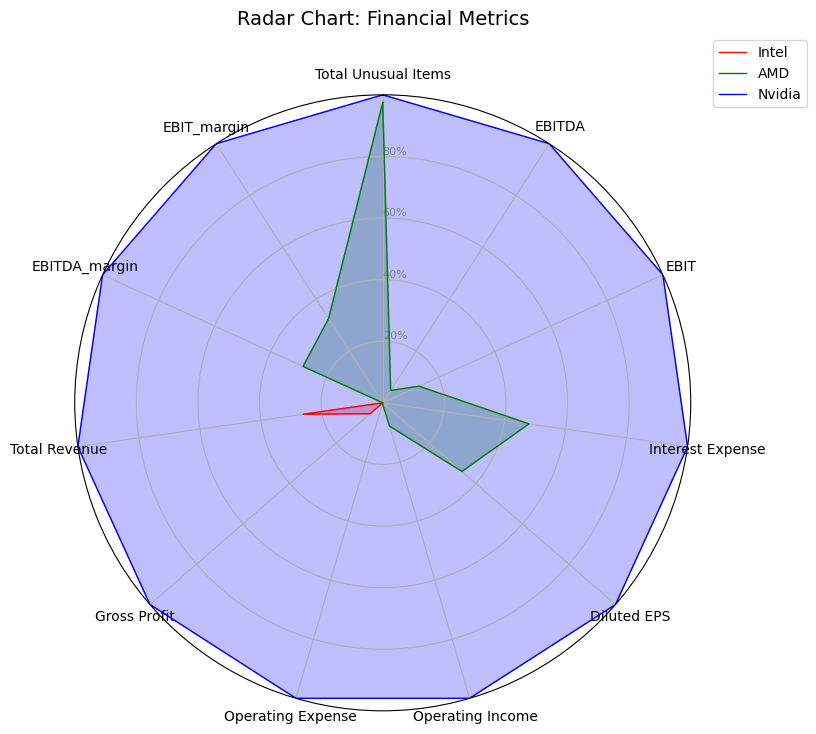

In [64]:
import numpy as np

# Prepare the radar chart parameters based on df's index
categories = list(df.index)
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Define colors for each company
colors = ['r', 'g', 'b']

for company, color in zip(df.columns, colors):
    # Get the company's values and close the loop by appending the first value
    values = df[company].tolist()
    values += values[:1]
    
    ax.plot(angles, values, color=color, linewidth=1, label=company)
    ax.fill(angles, values, color=color, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, size=10)

ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], color="grey", size=8)
plt.ylim(0, 1)

plt.title("Radar Chart: Financial Metrics", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for data in all_company_data:
    ax.plot(angles, data['values'], color=data['color'], linewidth=1, label=data['label'])
    ax.fill(angles, data['values'], color=data['color'], alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, size=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], color="grey", size=10)
plt.ylim(0, 1)

plt.title("Technical Health Radar Chart\n(Date: {})".format(amd_df_1y['date'].iloc[-1].strftime('%Y-%m-%d')),
          size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()